In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
import plotly.graph_objects as go


In [5]:
df=pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
499423,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
499424,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
499425,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
499426,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
499427,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [8]:
df.shape

(499428, 8)

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,499428.000000,499428.000000,379979.000000
mean,9.679517,4.481693,15271.312675
std,226.515728,92.194767,1710.629829
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13923.000000
50%,3.000000,2.080000,15116.000000
75%,10.000000,4.130000,16770.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1329
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     119449
Country             0
dtype: int64

In [11]:
df.isnull().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.266104
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     23.917161
Country         0.000000
dtype: float64

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [13]:
df1=df.drop(['Description'],axis=1)
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    499428 non-null  object 
 1   StockCode    499428 non-null  object 
 2   Description  498099 non-null  object 
 3   Quantity     499428 non-null  int64  
 4   InvoiceDate  499428 non-null  object 
 5   UnitPrice    499428 non-null  float64
 6   CustomerID   379979 non-null  float64
 7   Country      499428 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [15]:
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    499428 non-null  object        
 1   StockCode    499428 non-null  object        
 2   Quantity     499428 non-null  int64         
 3   InvoiceDate  499428 non-null  datetime64[ns]
 4   UnitPrice    499428 non-null  float64       
 5   CustomerID   379979 non-null  float64       
 6   Country      499428 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 26.7+ MB


In [17]:
df1['Revenue']=df1['Quantity']*df1['UnitPrice']
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


In [18]:
df1['Date']=df1['InvoiceDate'].apply(lambda x: str(x).split(' '))
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,"[2011-01-04, 10:00:00]"
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]"
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]"
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]"
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,"[2011-01-04, 10:00:00]"


In [19]:
df1[['date','Hour']]=pd.DataFrame(list(df1['Date']))
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,date,Hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    499428 non-null  object        
 1   StockCode    499428 non-null  object        
 2   Quantity     499428 non-null  int64         
 3   InvoiceDate  499428 non-null  datetime64[ns]
 4   UnitPrice    499428 non-null  float64       
 5   CustomerID   379979 non-null  float64       
 6   Country      499428 non-null  object        
 7   Revenue      499428 non-null  float64       
 8   Date         499428 non-null  object        
 9   date         499428 non-null  object        
 10  Hour         499428 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 41.9+ MB


In [21]:
df1['date']=pd.to_datetime(df1['date'])
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,date,Hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [22]:
df1=df1.dropna(subset=['CustomerID'])
df1.shape

(379979, 11)

In [23]:
pd.DataFrame(df1.isnull().sum(),columns=['Null Value'])

,Null Value
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Revenue,0
Date,0
date,0


In [24]:
df1['Year']=df1['InvoiceDate'].dt.year
df1['Month']=df1['InvoiceDate'].dt.month
df1['dayofweek']=df1['InvoiceDate'].dt.day_name()
df1['Weekday']=df1['InvoiceDate'].dt.dayofweek
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,date,Hour,Year,Month,dayofweek,Weekday
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,Tuesday,1
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,Tuesday,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,Tuesday,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,Tuesday,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,Tuesday,1


In [25]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379979 entries, 0 to 499427
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379979 non-null  object        
 1   StockCode    379979 non-null  object        
 2   Quantity     379979 non-null  int64         
 3   InvoiceDate  379979 non-null  datetime64[ns]
 4   UnitPrice    379979 non-null  float64       
 5   CustomerID   379979 non-null  float64       
 6   Country      379979 non-null  object        
 7   Revenue      379979 non-null  float64       
 8   Date         379979 non-null  object        
 9   date         379979 non-null  datetime64[ns]
 10  Hour         379979 non-null  object        
 11  Year         379979 non-null  int64         
 12  Month        379979 non-null  int64         
 13  dayofweek    379979 non-null  object        
 14  Weekday      379979 non-null  int64         
dtypes: datetime64[ns](2), float64(3), 

In [26]:
df1=df1.drop(columns=['Date'],index=1)
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,Hour,Year,Month,dayofweek,Weekday
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,Tuesday,1
5,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1


In [27]:
len(df1['Month'].unique())

12

In [28]:
len(df1['InvoiceNo'].unique())

20482

In [29]:
Monthly_revenue=df1.groupby('Month')['Revenue'].sum().reset_index().astype('int64')
Monthly_revenue
# Monthly revenue in each month

,Month,Revenue
0,1,475063
1,2,436546
2,3,579964
3,4,426047
4,5,648251
5,6,608013
6,7,574238
7,8,616368
8,9,931440
9,10,974603


In [30]:
plt.figure(figsize=(16,10))
Monthly_revenue_plot=px.bar(Monthly_revenue, x='Month', y='Revenue',labels={'x':'Month', 'y':'Revenue'},title='Monthly Revenue')
Monthly_revenue_plot

<Figure size 1152x720 with 0 Axes>

In [31]:
Monthly_revenue_avg=df1.groupby('Month')['Revenue'].mean().reset_index().astype('int64')
Monthly_revenue_avg
# Average monthly revenue in each month

,Month,Revenue
0,1,21
1,2,21
2,3,20
3,4,18
4,5,22
5,6,21
6,7,20
7,8,22
8,9,22
9,10,19


In [32]:
Monthly_revenue['growthrate']=Monthly_revenue['Revenue'].pct_change()
Monthly_revenue=Monthly_revenue.fillna(0)
Monthly_revenue

,Month,Revenue,growthrate
0,1,475063,0.000000
1,2,436546,-0.081078
2,3,579964,0.328529
3,4,426047,-0.265391
4,5,648251,0.521548
5,6,608013,-0.062072
6,7,574238,-0.055550
7,8,616368,0.073367
8,9,931440,0.511175
9,10,974603,0.046340


In [33]:
plt.figure(figsize=(16,10))
Monthly_growth_plot=px.line(Monthly_revenue,x='Month', y='growthrate',labels={'x':'Month','y':'growthrate'}, title='Monthly Growth Revenue')
Monthly_growth_plot
# It shows that in the month of april the growth is rate is very less.
# We will not consider the 12th month because the data of 12th month is not given.

<Figure size 1152x720 with 0 Axes>

In [34]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,Hour,Year,Month,dayofweek,Weekday
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,Tuesday,1
5,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1


In [35]:
df1['Country'].value_counts()/len(df1)*100

United Kingdom          88.779087
Germany                  2.350136
France                   2.119070
EIRE                     1.874582
Spain                    0.646880
Netherlands              0.605035
Belgium                  0.519504
Switzerland              0.481080
Portugal                 0.357915
Australia                0.322124
Norway                   0.247120
Italy                    0.200538
Channel Islands          0.195011
Finland                  0.178431
Cyprus                   0.141850
Sweden                   0.114480
Austria                  0.103164
Denmark                  0.097111
Poland                   0.087637
Japan                    0.077110
USA                      0.076583
Israel                   0.065267
Unspecified              0.064214
Singapore                0.060267
Iceland                  0.039739
Canada                   0.039739
Greece                   0.038423
Malta                    0.033423
United Arab Emirates     0.017896
European Commu

In [36]:
revenue_country=df1.groupby('Country')['Revenue'].sum().astype('int64')
revenue_country=revenue_country.reset_index().sort_values(by='Revenue')
revenue_country

,Country,Revenue
27,Saudi Arabia,131
2,Bahrain,548
8,Czech Republic,707
26,RSA,1002
4,Brazil,1143
11,European Community,1291
20,Lebanon,1693
32,USA,1730
33,United Arab Emirates,1902
21,Malta,2505


In [37]:
plt.figure(figsize=(18,15))
revenue_country_bar=px.bar(revenue_country,x='Country',y= "Revenue",labels={'x':'Country','y':'Revenue'}, title='Country Revenue' )
revenue_country_bar
# revenue is more in United Kingdom. Hence sales are also more

<Figure size 1296x1080 with 0 Axes>

In [38]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,Hour,Year,Month,dayofweek,Weekday
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,Tuesday,1
5,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1


In [39]:
#  Seeing the active customers every month
active_customers=df1.groupby('Month')['CustomerID'].nunique().reset_index()
active_customers

,Month,CustomerID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


In [40]:
plt.figure(figsize=(16,10))
active_customers_plot=px.bar(active_customers,x='Month', y='CustomerID',labels={'x':'Month','y':'Unique Customers'}, title='Monthly unique cutomers')
active_customers_plot

<Figure size 1152x720 with 0 Axes>

In [41]:
active_customers_country=df1.groupby('Country')['CustomerID'].nunique().reset_index()
active_customers_country
# This shows that how many number of active customers were there from each country

,Country,CustomerID
0,Australia,9
1,Austria,10
2,Bahrain,2
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,8
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


In [42]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,Hour,Year,Month,dayofweek,Weekday
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,Tuesday,1
5,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1


In [43]:
Monthly_invoice=df1.groupby('Month')['InvoiceNo'].nunique().reset_index()
Monthly_invoice

,Month,InvoiceNo
0,1,1236
1,2,1202
2,3,1619
3,4,1384
4,5,1849
5,6,1707
6,7,1593
7,8,1544
8,9,2078
9,10,2263


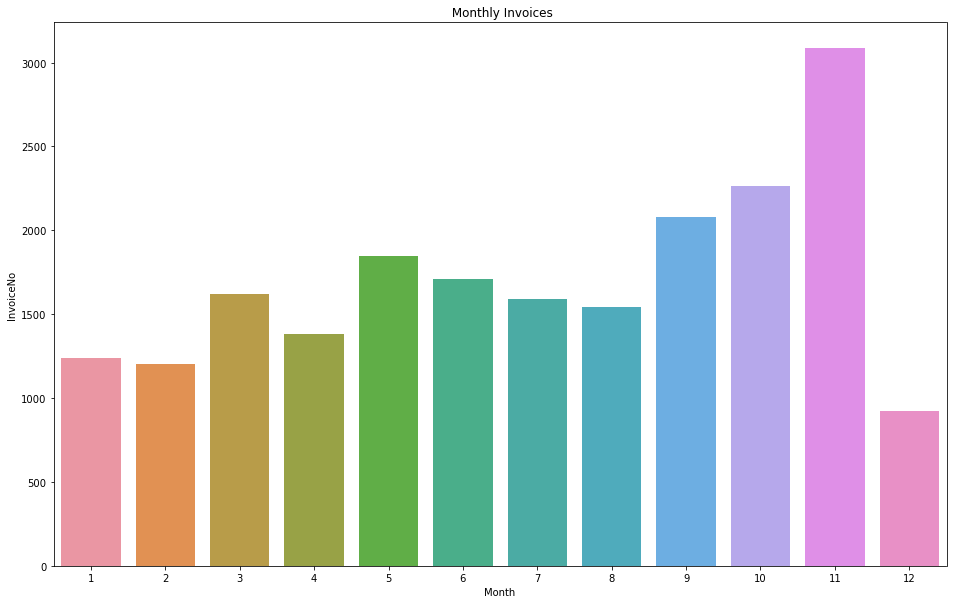

In [44]:
plt.figure(figsize=(16,10))
Monthly_invoice_plot=sns.barplot(x='Month', y='InvoiceNo',data=Monthly_invoice).set(title=' Monthly Invoices')
plt.show()

In [45]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,Hour,Year,Month,dayofweek,Weekday
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,Tuesday,1
5,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1


In [46]:
first_purchase=df1.groupby('CustomerID').date.min().reset_index()
first_purchase

,CustomerID,date
0,12346.0,2011-01-18
1,12347.0,2011-01-26
2,12348.0,2011-01-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4239,18280.0,2011-03-07
4240,18281.0,2011-06-12
4241,18282.0,2011-08-05
4242,18283.0,2011-01-06


In [47]:
first_purchase=first_purchase.rename(columns={'date':'firstpurchase'})
first_purchase

,CustomerID,firstpurchase
0,12346.0,2011-01-18
1,12347.0,2011-01-26
2,12348.0,2011-01-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4239,18280.0,2011-03-07
4240,18281.0,2011-06-12
4241,18282.0,2011-08-05
4242,18283.0,2011-01-06


In [48]:
first_purchase['FirstPurchaseyear']=first_purchase['firstpurchase'].dt.year
first_purchase['FirstPurchaseMonth']=first_purchase['firstpurchase'].dt.month
first_purchase['FirstPurchasedate']=first_purchase['firstpurchase'].dt.day

first_purchase

,CustomerID,firstpurchase,FirstPurchaseyear,FirstPurchaseMonth,FirstPurchasedate
0,12346.0,2011-01-18,2011,1,18
1,12347.0,2011-01-26,2011,1,26
2,12348.0,2011-01-25,2011,1,25
3,12349.0,2011-11-21,2011,11,21
4,12350.0,2011-02-02,2011,2,2
...,...,...,...,...,...
4239,18280.0,2011-03-07,2011,3,7
4240,18281.0,2011-06-12,2011,6,12
4241,18282.0,2011-08-05,2011,8,5
4242,18283.0,2011-01-06,2011,1,6


In [49]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,Hour,Year,Month,dayofweek,Weekday
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,Tuesday,1
5,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1


In [50]:
first_purchase

,CustomerID,firstpurchase,FirstPurchaseyear,FirstPurchaseMonth,FirstPurchasedate
0,12346.0,2011-01-18,2011,1,18
1,12347.0,2011-01-26,2011,1,26
2,12348.0,2011-01-25,2011,1,25
3,12349.0,2011-11-21,2011,11,21
4,12350.0,2011-02-02,2011,2,2
...,...,...,...,...,...
4239,18280.0,2011-03-07,2011,3,7
4240,18281.0,2011-06-12,2011,6,12
4241,18282.0,2011-08-05,2011,8,5
4242,18283.0,2011-01-06,2011,1,6


In [51]:
first_purchase['FirstPurchaseMonth'].dtype

dtype('int64')

In [52]:
df1['Month'].dtype

dtype('int64')

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
df1=pd.merge(df1, first_purchase, on='CustomerID')
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,Hour,Year,Month,dayofweek,Weekday,firstpurchase,FirstPurchaseyear,FirstPurchaseMonth,FirstPurchasedate
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4
1,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4
2,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4
3,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4
4,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4


In [55]:
df1['User']='New'
df1.loc[df1['Month']>df1['FirstPurchaseMonth'], 'User']='Existing'

In [56]:
df1['User'].value_counts()/len(df)*100
# Percentage of new customer is almost half of the existing customer, so we should focus more on the existing customers.

Existing    52.961588
New         23.121050
Name: User, dtype: float64

In [57]:
User_revenue_total=df1.groupby(['Month','User'])['Revenue'].sum().reset_index()
User_revenue_total

,Month,User,Revenue
0,1,New,475063.880
1,2,Existing,222645.040
2,2,New,213901.110
3,3,Existing,356562.750
4,3,New,223401.860
5,4,Existing,283526.090
6,4,New,142521.761
7,5,Existing,518892.810
8,5,New,129358.270
9,6,Existing,508100.200


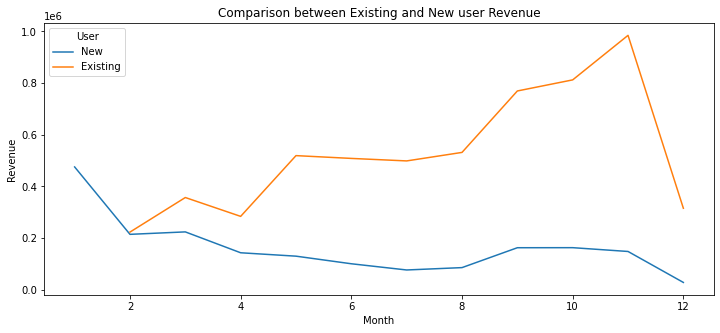

In [58]:
plt.figure(figsize=(12,5))
User_revenue_plot=sns.lineplot(x='Month', y='Revenue',data=User_revenue_total, hue='User').set(title='Comparison between Existing and New user Revenue')
plt.show()

In [59]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,Hour,Year,Month,dayofweek,Weekday,firstpurchase,FirstPurchaseyear,FirstPurchaseMonth,FirstPurchasedate,User
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New
1,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New
2,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New
3,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New
4,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New


In [60]:
latest_purchase=df1.groupby('CustomerID').date.max().reset_index()
latest_purchase=latest_purchase.rename(columns={'date':'lat_purch_date'})
latest_purchase

,CustomerID,lat_purch_date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4239,18280.0,2011-03-07
4240,18281.0,2011-06-12
4241,18282.0,2011-12-02
4242,18283.0,2011-12-06


In [62]:
latest_purchase['Recency'] = (latest_purchase['lat_purch_date'].max() - latest_purchase['lat_purch_date']).dt.days
latest_purchase

,CustomerID,lat_purch_date,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
...,...,...,...
4239,18280.0,2011-03-07,277
4240,18281.0,2011-06-12,180
4241,18282.0,2011-12-02,7
4242,18283.0,2011-12-06,3


In [63]:
latest_purchase=latest_purchase.drop(columns=['lat_purch_date'])


In [64]:
latest_purchase.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [65]:
latest_purchase['Recency'].describe()

count    4244.000000
mean       83.337653
std        90.213455
min         0.000000
25%        16.000000
50%        46.000000
75%       127.000000
max       339.000000
Name: Recency, dtype: float64

#### Frequency
1. To find the frequency we need to find the number invoices by each customer


In [66]:
df1.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,Hour,Year,Month,dayofweek,Weekday,firstpurchase,FirstPurchaseyear,FirstPurchaseMonth,FirstPurchasedate,User
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New
1,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New
2,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New
3,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New
4,539993,85099B,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,Tuesday,1,2011-01-04,2011,1,4,New


In [67]:
customer_freq=df1.groupby('CustomerID')['InvoiceNo'].count().reset_index()
customer_freq.columns=['CustomerID','Frequency of Customer']
customer_freq

,CustomerID,Frequency of Customer
0,12346.0,2
1,12347.0,151
2,12348.0,14
3,12349.0,73
4,12350.0,17
...,...,...
4239,18280.0,10
4240,18281.0,7
4241,18282.0,13
4242,18283.0,756


In [68]:
customer_freq['Frequency of Customer'].describe()

count    4244.000000
mean       89.532988
std       223.075489
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7692.000000
Name: Frequency of Customer, dtype: float64

In [69]:
customer_monetory=df1.groupby('CustomerID')['Revenue'].sum().reset_index()
customer_monetory.columns=['CustomerID','MonetorySpend']
customer_monetory

,CustomerID,MonetorySpend
0,12346.0,0.00
1,12347.0,3598.21
2,12348.0,904.44
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4239,18280.0,180.60
4240,18281.0,80.82
4241,18282.0,176.60
4242,18283.0,2094.88


In [70]:
customer_monetory['MonetorySpend'].describe()

count      4244.000000
mean       1825.035649
std        7885.718013
min       -4287.630000
25%         290.955000
50%         642.485000
75%        1563.750000
max      270897.140000
Name: MonetorySpend, dtype: float64